# Detect Lego by color space

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

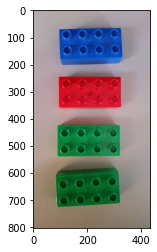

In [77]:
# Load an image
img = cv2.imread('assets/lego.png')
img_show = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_show)

In [125]:

# Convert BGR to HLS color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # H in [0,360] & S,V in [0,255]

# Define ranges of blue, red, and green colors in HLS
lower_blue = np.array([80, 80, 20])
upper_blue = np.array([150, 255, 255])

### Red corlor have color space in range 270-10
lower_red = np.array([0, 50, 50])
upper_red = np.array([5, 255, 255])
lower_red2 = np.array([175, 80, 20])
upper_red2 = np.array([180, 255, 255])

lower_green = np.array([40, 80, 20])
upper_green = np.array([80, 255, 255])

# Threshold the HLS image to get only blue, red, and green colors
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)

mask_red = cv2.inRange(hsv, lower_red, upper_red)
mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask_red_final = cv2.bitwise_or(mask_red, mask_red2)

mask_green = cv2.inRange(hsv, lower_green, upper_green)

### Process 
# img_erosion = cv2.erode(img, kernel, iterations=1) # cut off
kernel = np.ones((5, 5), np.uint8)
img_dilation_blue = cv2.dilate(mask_blue, kernel, iterations=1) # 

img_erosion_red = cv2.erode(mask_red_final, kernel, iterations=2) # cut off
img_dilation_red = cv2.dilate(img_erosion_red, kernel, iterations=1) # 

img_dilation_green = cv2.dilate(mask_green, kernel, iterations=1) # 

Text(0.5, 1.0, 'mask_green_preprocess')

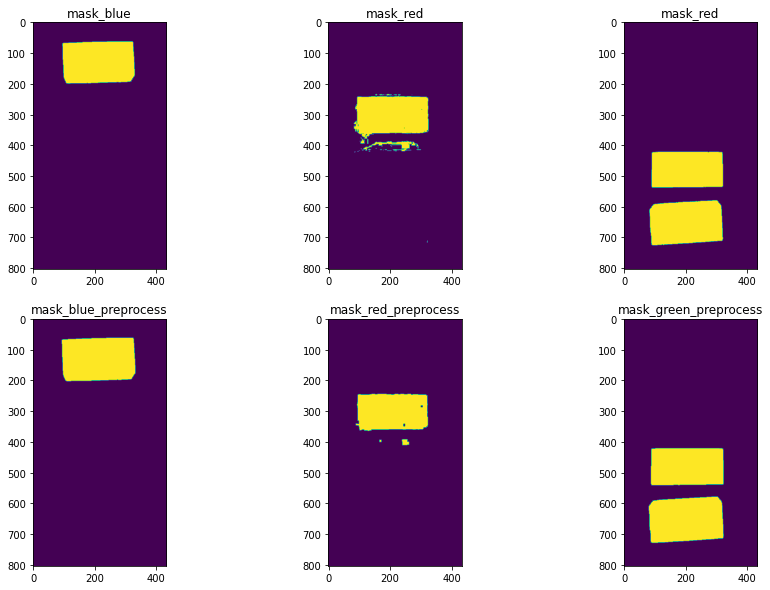

In [135]:
fig, ax = plt.subplots(2, 3, figsize=(15,10))
ax[0][0].imshow(mask_blue)
ax[0][0].set_title('mask_blue')
ax[0][1].imshow(mask_red_final)
ax[0][1].set_title('mask_red')
ax[0][2].imshow(mask_green)
ax[0][2].set_title('mask_red')

ax[1][0].imshow(img_dilation_blue)
ax[1][0].set_title('mask_blue_preprocess')
ax[1][1].imshow(img_dilation_red)
ax[1][1].set_title('mask_red_preprocess')
ax[1][2].imshow(img_dilation_green)
ax[1][2].set_title('mask_green_preprocess')

25460.0


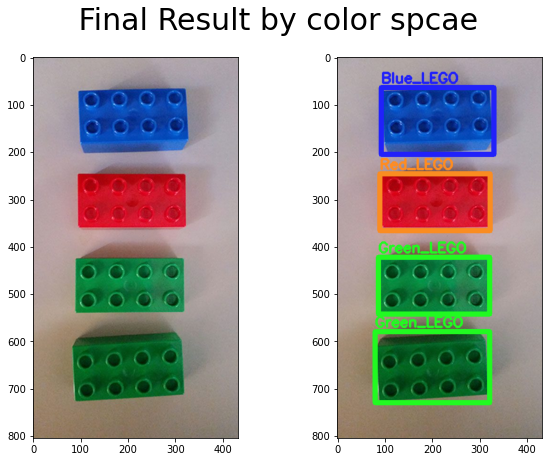

In [187]:
# Find contours of blue, red, and green objects
contours_blue, hierarchy = cv2.findContours(img_dilation_blue, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_red, hierarchy = cv2.findContours(img_dilation_red, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_green, hierarchy = cv2.findContours(img_dilation_green, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes around blue, red, and green objects
Threshod_area =6000
img_draw = img.copy()
for contour in contours_blue:
    area = cv2.contourArea(contour)
    if area > Threshod_area:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(img_draw, (x, y), (x + w, y + h), (250, 33, 33), 10)
        cv2.putText(img_draw, "Blue_LEGO", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (250, 33, 33), 3)

for contour in contours_red:
    area = cv2.contourArea(contour)
    if area > Threshod_area:
        print(area)
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(img_draw, (x, y), (x + w, y + h), (33, 140, 250), 10)
        cv2.putText(img_draw, "Red_LEGO", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (33, 140, 255), 3)

for contour in contours_green:
    area = cv2.contourArea(contour)
    if area > Threshod_area:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(img_draw, (x, y), (x + w, y + h), (33, 250, 33), 10)
        cv2.putText(img_draw, "Green_LEGO", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (33, 250, 33), 3)
    
fig, ax = plt.subplots(1, 2, figsize=(10,7))
fig.suptitle(' Final Result by color spcae ', fontsize=30)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(img_draw, cv2.COLOR_BGR2RGB))

# Detect lego by canny

In [148]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

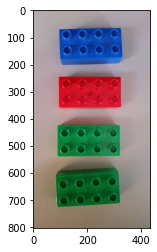

In [149]:
img = cv2.imread('assets/lego.png')
img_show = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_show)

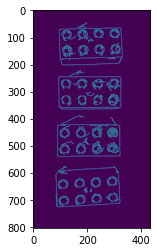

In [181]:
# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 30, 100)
plt.imshow(edges)

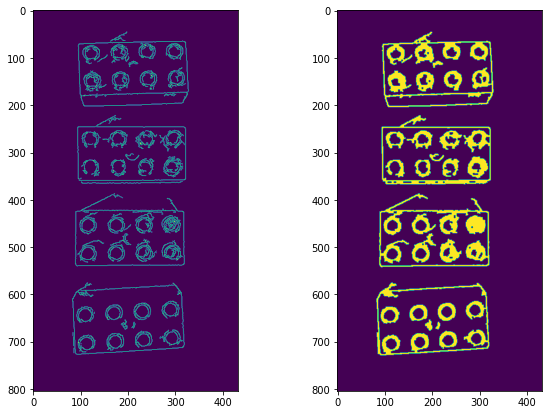

In [183]:
### Process 
im = edges.copy()
kernel = np.ones((5, 5), np.uint8)
img_dilation = cv2.dilate(im, kernel, iterations=1) # fill

kernel = np.ones((2, 2), np.uint8)
img_erosion = cv2.erode(img_dilation, kernel, iterations=2) # cut

fig, ax = plt.subplots(1, 2, figsize=(10,7))
ax[0].imshow(edges)
ax[1].imshow(img_erosion)

31570.0
27639.5
27844.5
30892.0


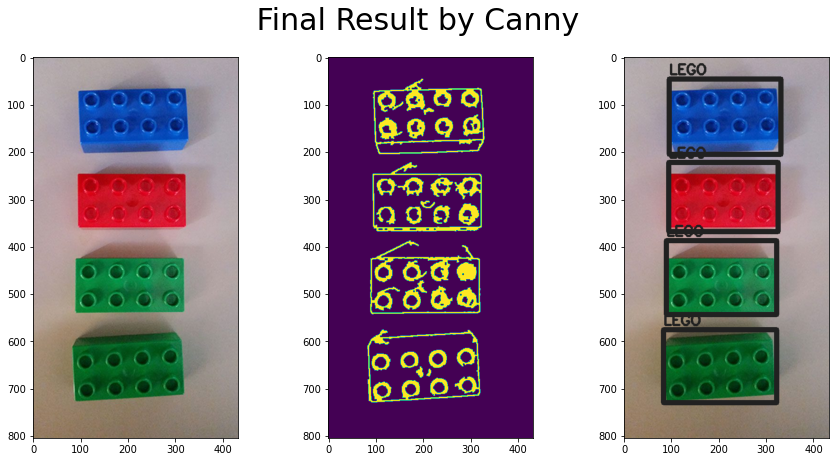

In [186]:
contours, hierarchy = cv2.findContours(img_erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
Threshod_area =3000
img_draw = img.copy()
for contour in contours:
    area = cv2.contourArea(contour)
    if area > Threshod_area:
        print(area)
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(img_draw, (x, y), (x + w, y + h), (33, 33, 33), 10)
        cv2.putText(img_draw, "LEGO", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (33, 33, 33), 3)
        
fig, ax = plt.subplots(1, 3, figsize=(15,7))
fig.suptitle(' Final Result by Canny ', fontsize=30)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].imshow(img_erosion)
ax[2].imshow(cv2.cvtColor(img_draw, cv2.COLOR_BGR2RGB))